In [6]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib as plt

In [7]:
df_Rosario= pd.read_excel('./Rosario F.xlsx')

Debera catacterizar el voto utilizando los datos de la muestra y cualquier otra fuente secundaria que considere. Debera subir el codigo utilizado al repositorio y preprar un informe con los descubrimientos mas relevantes.
1. Porcentaje de voto por edad y por genero
2. Datos de georreferenciación
3. Dos regresiones: 1 con edad y 1 con genero.
4. Cruzar voto por radio. 

In [8]:
df_Rosario.shape


(372, 8)

In [9]:
df_Rosario.dtypes


interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                      int64
dtype: object

In [10]:
df_Rosario.head

<bound method NDFrame.head of     interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO  
0    Ma

In [11]:
df_Rosario['INT DE VOTO X ESPACIO'] = df_Rosario['INT DE VOTO X ESPACIO'].astype(str)


frecuencias = df_Rosario['INT DE VOTO X ESPACIO'].value_counts()


porcentajes = (frecuencias / frecuencias.sum()) * 100


resultados = pd.DataFrame({
    'Categoría': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje': porcentajes.values
})


print(resultados)


        Categoría  Frecuencia  Porcentaje
0             JxC          90   24.193548
1             FdT          80   21.505376
2  NINGUNO/NOSABE          72   19.354839
3     LIBERTARIOS          57   15.322581
4           OTROS          35    9.408602
5             PNK          26    6.989247
6             FIT          12    3.225806


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

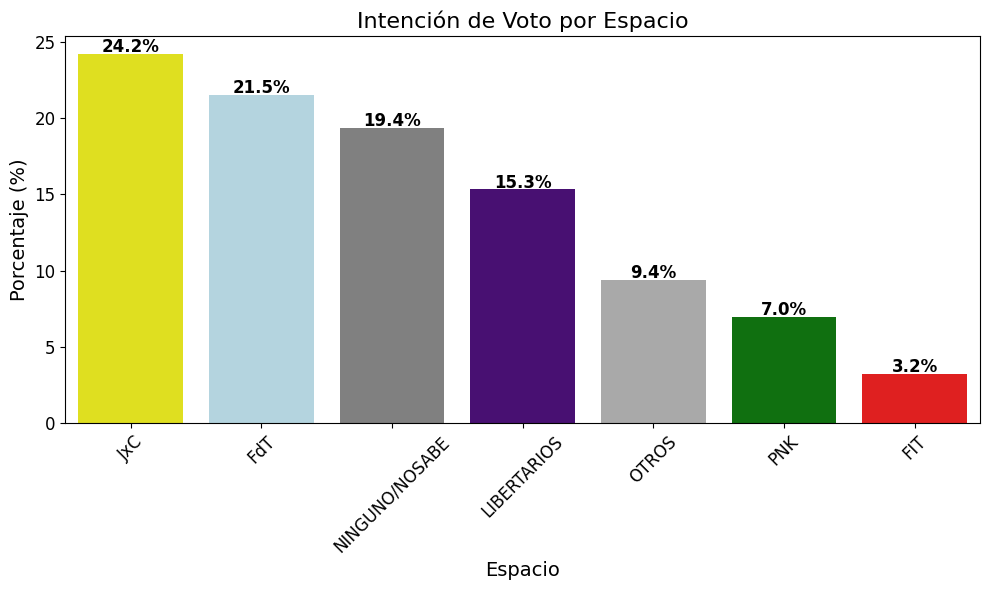

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


resultados['Color'] = resultados['Categoría'].map(colores)


plt.figure(figsize=(10, 6))

ax = sns.barplot(data=resultados, x='Categoría', y='Porcentaje', 
                 hue='Categoría', palette=colores)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')  


plt.title('Intención de Voto por Espacio', fontsize=16)
plt.xlabel('Espacio', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [13]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['EDAD'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_EDAD_VOTO = tabla_cruzada_porcentaje_columna.copy()


print(df_EDAD_VOTO)



EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [14]:
df_EDAD_VOTO.dtypes


EDAD
16 a 25     float64
26 a 35     float64
36 a 45     float64
46 a 55     float64
56 y mas    float64
dtype: object

In [15]:
print(df_EDAD_VOTO.columns)


Index(['16 a 25', '26 a 35', '36 a 45', '46 a 55', '56 y mas'], dtype='object', name='EDAD')


In [16]:
print(df_EDAD_VOTO)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [17]:
df_EDAD_VOTO.reset_index(inplace=True)

In [18]:

df_larga = df_EDAD_VOTO.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='EDAD', 
                                 value_name='Porcentaje')


print(df_larga.head())

  INT DE VOTO X ESPACIO     EDAD  Porcentaje
0                   FIT  16 a 25    3.571429
1                   FdT  16 a 25   25.000000
2                   JxC  16 a 25   25.000000
3           LIBERTARIOS  16 a 25   25.000000
4        NINGUNO/NOSABE  16 a 25   21.428571


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

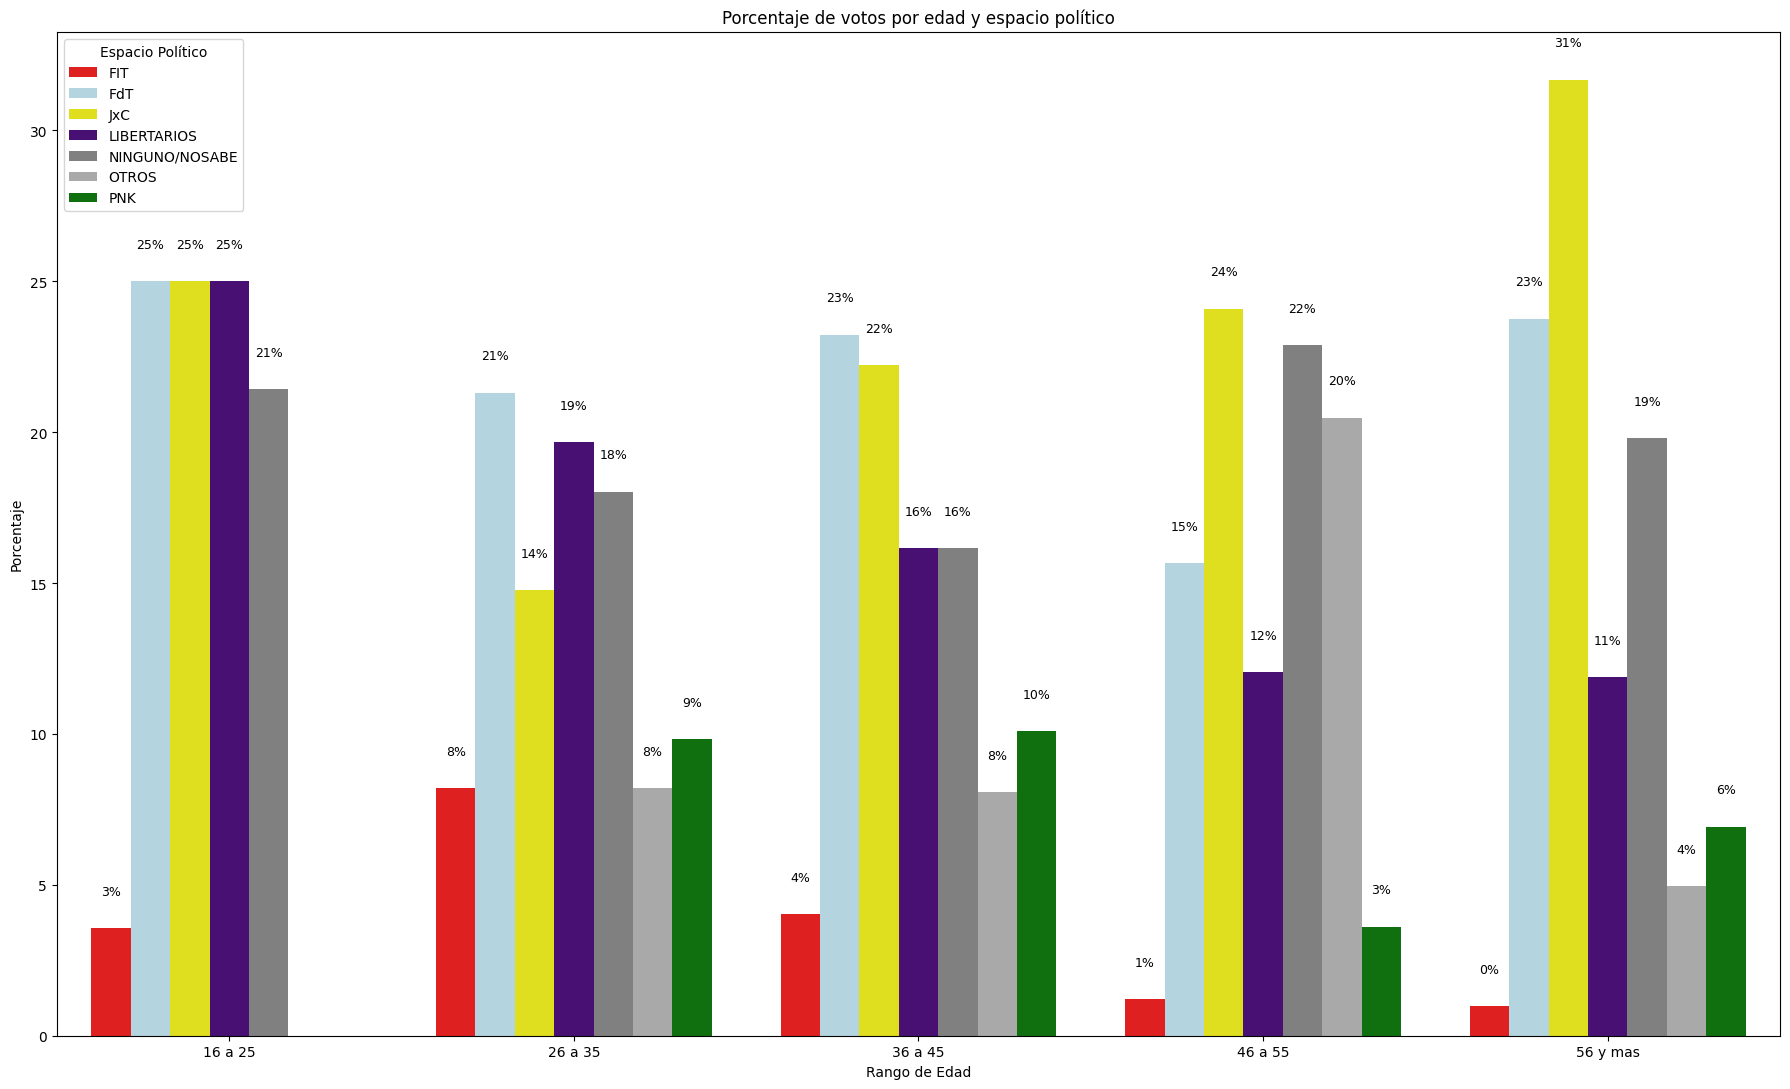

In [19]:

colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, errorbar=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)



plt.title('Porcentaje de votos por edad y espacio político')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Espacio Político', loc='upper left')


plt.tight_layout()
plt.show()

In [20]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['GENERO'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_porcentajes2 = tabla_cruzada_porcentaje_columna.copy()


print(df_porcentajes2)



GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                     3.030303   2.525253  22.222222
FdT                    21.212121  22.727273   0.000000
JxC                    25.454545  24.242424   0.000000
LIBERTARIOS             6.666667  22.222222  22.222222
NINGUNO/NOSABE         24.242424  14.141414  44.444444
OTROS                  11.515152   7.575758  11.111111
PNK                     7.878788   6.565657   0.000000


In [21]:
df_porcentajes2.reset_index(inplace=True)


df_larga2 = df_porcentajes2.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='GENERO', 
                                 value_name='Porcentaje')


print(df_larga2.head())


  INT DE VOTO X ESPACIO    GENERO  Porcentaje
0                   FIT  Femenino    3.030303
1                   FdT  Femenino   21.212121
2                   JxC  Femenino   25.454545
3           LIBERTARIOS  Femenino    6.666667
4        NINGUNO/NOSABE  Femenino   24.242424


In [22]:
print(df_porcentajes2.columns)


Index(['INT DE VOTO X ESPACIO', 'Femenino', 'Masculino', 'Otro'], dtype='object', name='GENERO')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

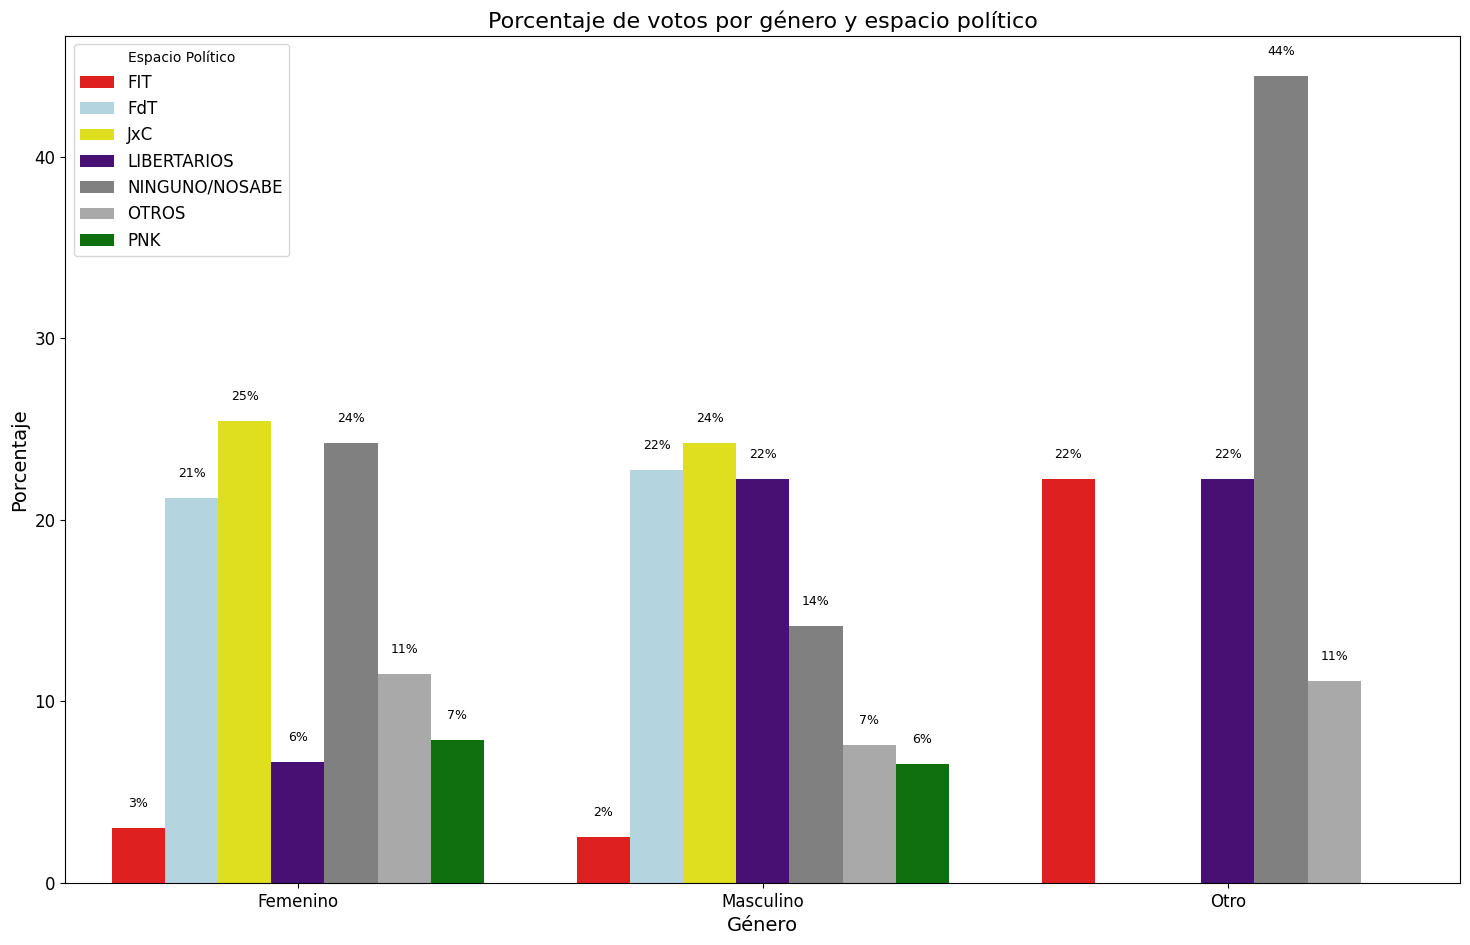

In [23]:
df_larga2 = df_larga2[['GENERO', 'INT DE VOTO X ESPACIO', 'Porcentaje']]


df_larga2.reset_index(drop=True, inplace=True)


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, errorbar=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)


plt.title('Porcentaje de votos por género y espacio político', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Espacio Político', loc='upper left', fontsize=12)


In [24]:
valores_INTNVOTO = df_Rosario ['INT DE VOTO X ESPACIO'].unique() 
valores_EDAD = df_Rosario ['EDAD'].unique()

print("Valores únicos en INTENCIÓN DE VOTO:", valores_INTNVOTO) 
print("Valores únicos en EDAD:", valores_EDAD)

Valores únicos en INTENCIÓN DE VOTO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']
Valores únicos en EDAD: ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']


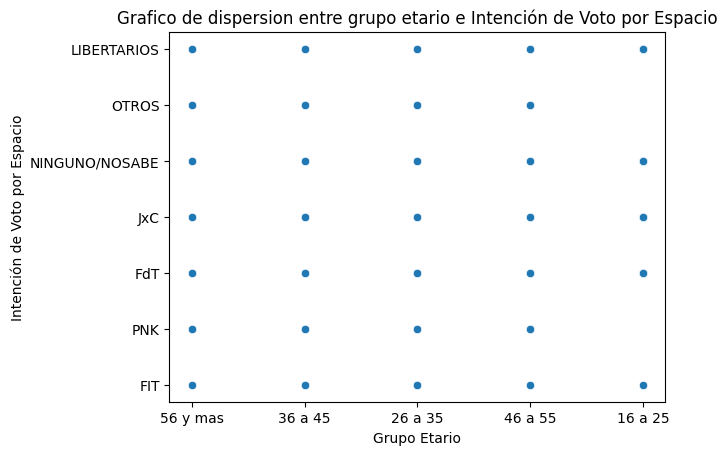

In [25]:
sns.scatterplot(x='EDAD', y='INT DE VOTO X ESPACIO', data=df_Rosario)

plt.title('Grafico de dispersion entre grupo etario e Intención de Voto por Espacio')
plt.xlabel('Grupo Etario')
plt.ylabel('Intención de Voto por Espacio')
plt.show()

In [26]:
edad_ordinal_map = {
    '16 a 25': 1,
    '26 a 35': 2,
    '36 a 45': 3,
    '46 a 55': 4,
    '56 y mas': 5
}
df_Rosario['EDAD_ORDINAL'] = df_Rosario['EDAD'].map(edad_ordinal_map)

df_Rosario_dummies = pd.get_dummies(
    df_Rosario, 
    columns=['GENERO', 'INT DE VOTO X ESPACIO'], 
    drop_first=False  # Incluir todas las categorías
)

columnas_a_eliminar = ['RADIO', 'Coord1__Latitude', 'Coord1__Longitude', 'METODO', 'interview__key', 'EDAD']
df_Rosario_final = df_Rosario_dummies.drop(columns=columnas_a_eliminar, axis=1)

df_Rosario_final = df_Rosario_final.astype(int)

print(df_Rosario_final.head())

   EDAD_ORDINAL  GENERO_Femenino  GENERO_Masculino  GENERO_Otro  \
0             5                0                 1            0   
1             3                0                 1            0   
2             5                1                 0            0   
3             2                0                 1            0   
4             3                1                 0            0   

   INT DE VOTO X ESPACIO_FIT  INT DE VOTO X ESPACIO_FdT  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INT DE VOTO X ESPACIO_JxC  INT DE VOTO X ESPACIO_LIBERTARIOS  \
0                          0                                  1   
1                          0                                  0   
2                          0             

Optimization terminated successfully.
         Current function value: 0.146708
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      371
Method:                                  MLE   Df Model:                            0
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                -0.02949
Time:                               11:32:51   Log-Likelihood:                -54.576
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -1.1486      0.117     -9.830   

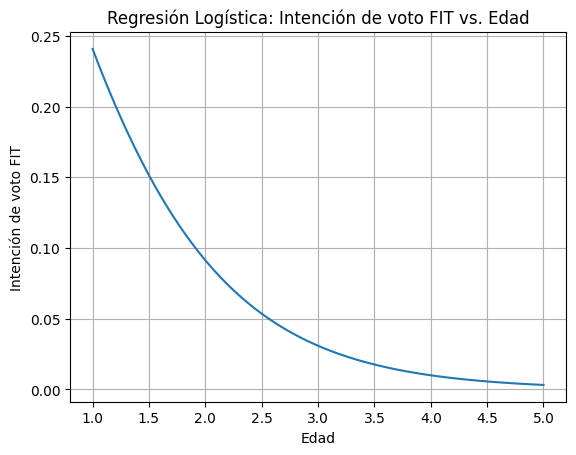

In [27]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto FIT')
plt.title('Regresión Logística: Intención de voto FIT vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.536556
         Iterations 5
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      371
Method:                                  MLE   Df Model:                            0
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                -0.03070
Time:                               11:32:51   Log-Likelihood:                -199.60
converged:                              True   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -0.3441      0.036     -9.564   

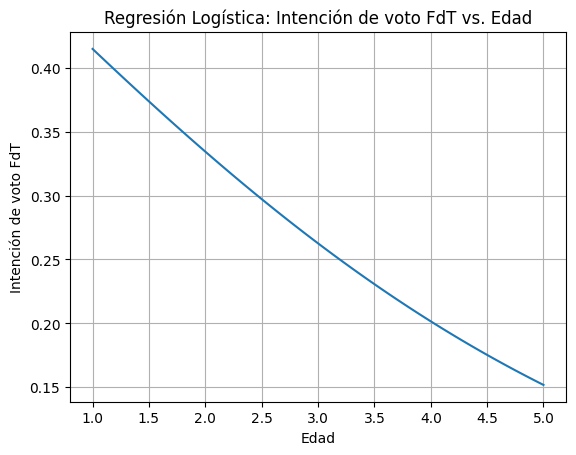

In [28]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto FdT')
plt.title('Regresión Logística: Intención de voto FdT vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.583939
         Iterations 5
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      371
Method:                                  MLE   Df Model:                            0
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                -0.05537
Time:                               11:32:52   Log-Likelihood:                -217.23
converged:                              True   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -0.2762      0.033     -8.310   

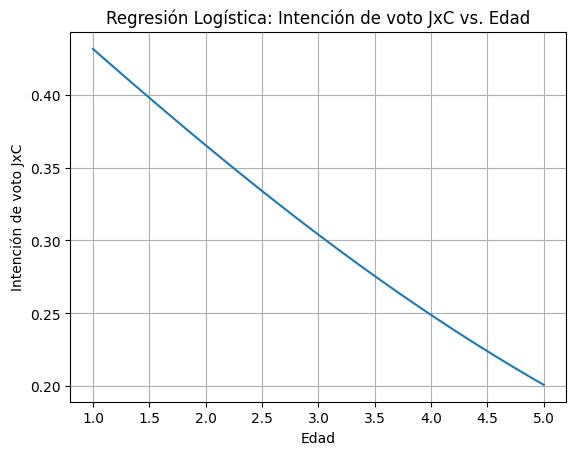

In [29]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto JxC')
plt.title('Regresión Logística: Intención de voto JxC vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.430950
         Iterations 6
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      371
Method:                                          MLE   Df Model:                            0
Date:                               Tue, 26 Nov 2024   Pseudo R-squ.:               -0.006272
Time:                                       11:32:52   Log-Likelihood:                -160.31
converged:                                      True   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

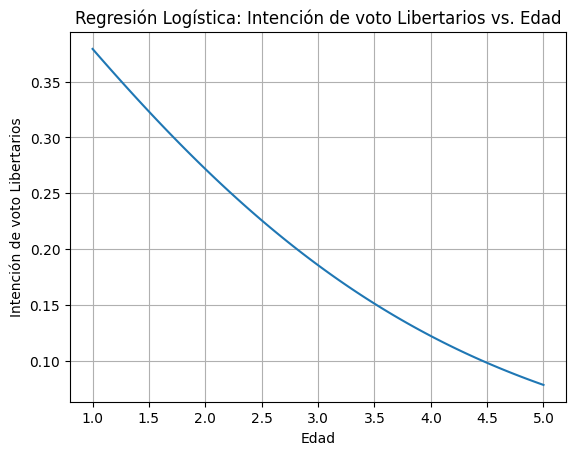

In [30]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Libertarios')
plt.title('Regresión Logística: Intención de voto Libertarios vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.354133
         Iterations 6
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      371
Method:                                    MLE   Df Model:                            0
Date:                         Tue, 26 Nov 2024   Pseudo R-squ.:                 -0.1354
Time:                                 11:32:52   Log-Likelihood:                -131.74
converged:                                True   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -0.6133      0.0

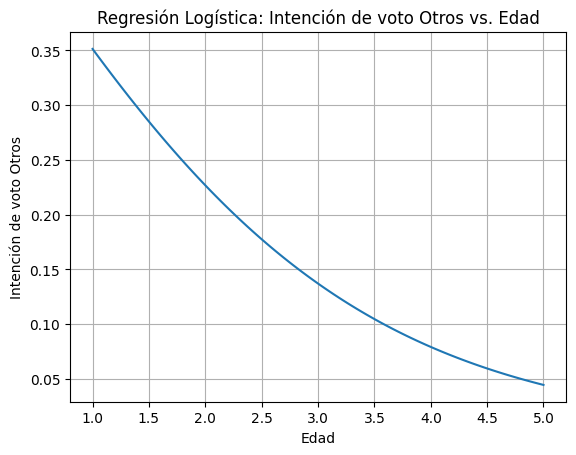

In [31]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Otros')
plt.title('Regresión Logística: Intención de voto Otros vs. Edad')
plt.grid(True)
plt.show()

Optimization terminated successfully.
         Current function value: 0.515342
         Iterations 5
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      371
Method:                                             MLE   Df Model:                            0
Date:                                  Tue, 26 Nov 2024   Pseudo R-squ.:                -0.04888
Time:                                          11:32:52   Log-Likelihood:                -191.71
converged:                                         True   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

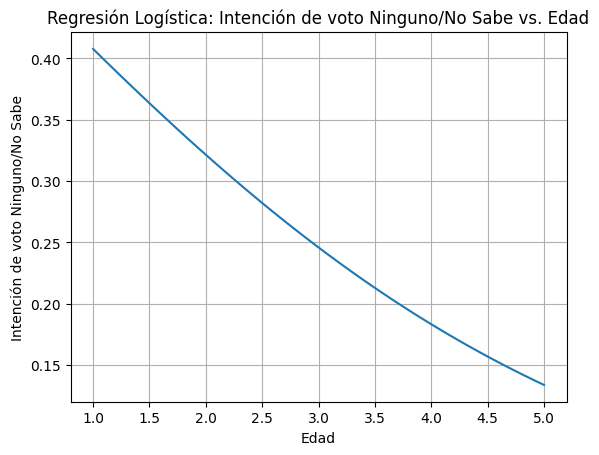

In [32]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

rango_edad = np.linspace(X.min(), X.max(), 100)
voto_espacio = resultado.predict(rango_edad)

plt.plot(rango_edad, voto_espacio)
plt.xlabel('Edad')
plt.ylabel('Intención de voto Ninguno/No Sabe')
plt.title('Regresión Logística: Intención de voto Ninguno/No Sabe vs. Edad')
plt.grid(True)
plt.show()

REGRESION LOGISTICA INT DE VOTO Y GENERO

In [33]:
import statsmodels.api as sm
import pandas as pd
# GRÁFICO
import matplotlib.pyplot as plt
import seaborn as sns
df_Rosario_final.head()
print(df_Rosario_final.dtypes)

EDAD_ORDINAL                            int64
GENERO_Femenino                         int64
GENERO_Masculino                        int64
GENERO_Otro                             int64
INT DE VOTO X ESPACIO_FIT               int64
INT DE VOTO X ESPACIO_FdT               int64
INT DE VOTO X ESPACIO_JxC               int64
INT DE VOTO X ESPACIO_LIBERTARIOS       int64
INT DE VOTO X ESPACIO_NINGUNO/NOSABE    int64
INT DE VOTO X ESPACIO_OTROS             int64
INT DE VOTO X ESPACIO_PNK               int64
dtype: object


In [34]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.514474
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01172
Time:                               11:32:52   Log-Likelihood:                -191.38
converged:                             False   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                    0.1033
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8817        nan        nan        nan         nan    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/1972838993.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

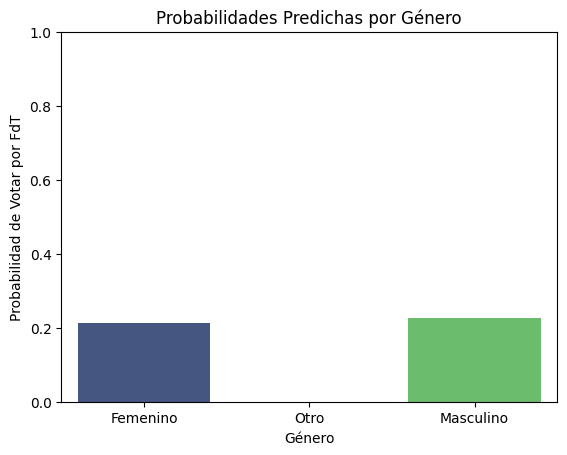

In [35]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por FdT')
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()


In [36]:
GENEROS = ['Femenino', 'Masculino', 'Otro']

In [37]:
probabilidades_predichas = result.predict(X)

In [38]:
promedio_prob_genero = [
    np.mean(probabilidades_predichas[df_Rosario_final['GENERO_Femenino'] == 1]),
    np.mean(probabilidades_predichas[df_Rosario_final['GENERO_Masculino'] == 1]),
    np.mean(probabilidades_predichas[df_Rosario_final['GENERO_Otro'] == 1]),
]

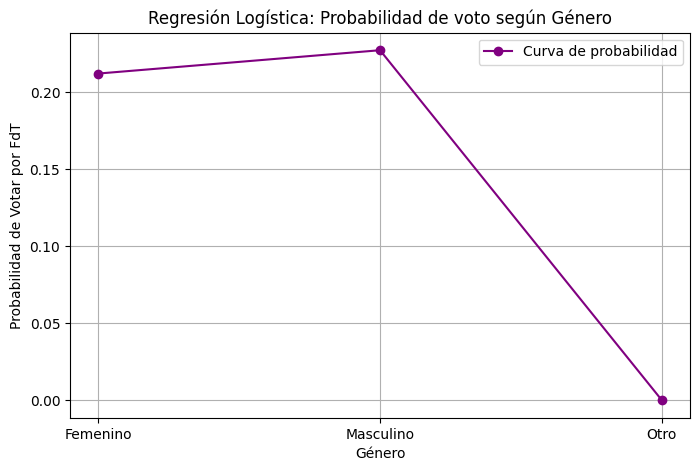

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por FdT')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.546409
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.01246
Time:                               11:32:52   Log-Likelihood:                -203.26
converged:                             False   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                   0.07702
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -6.8013        nan        nan        nan         nan    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/873174316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

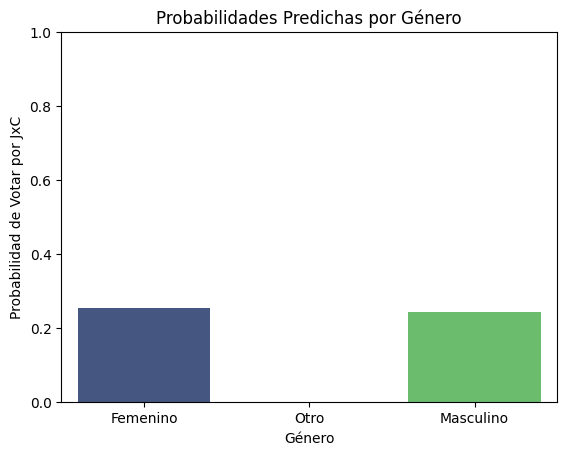

In [41]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por JxC') 
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

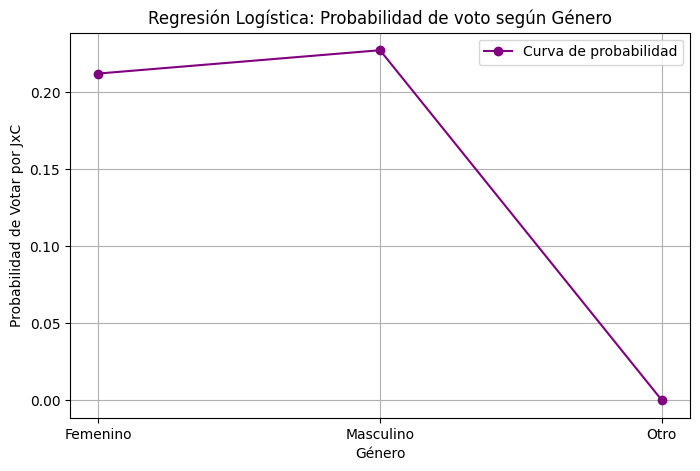

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por JxC')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.403394
         Iterations: 35
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      369
Method:                                          MLE   Df Model:                            2
Date:                               Tue, 26 Nov 2024   Pseudo R-squ.:                 0.05807
Time:                                       11:32:52   Log-Likelihood:                -150.06
converged:                                     False   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                 9.596e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/1286028094.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

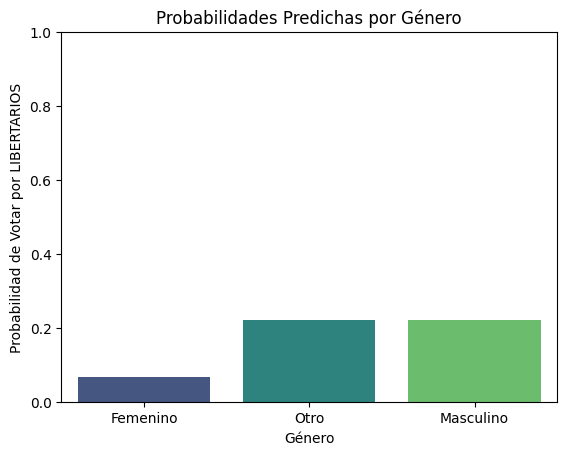

In [44]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por LIBERTARIOS') 
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

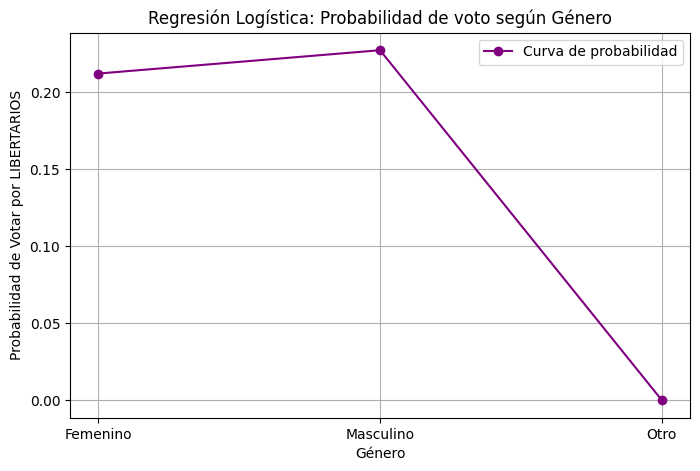

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por LIBERTARIOS')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.479190
         Iterations 7
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      369
Method:                                             MLE   Df Model:                            2
Date:                                  Tue, 26 Nov 2024   Pseudo R-squ.:                 0.02470
Time:                                          11:32:53   Log-Likelihood:                -178.26
converged:                                         True   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                   0.01094
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/157392070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

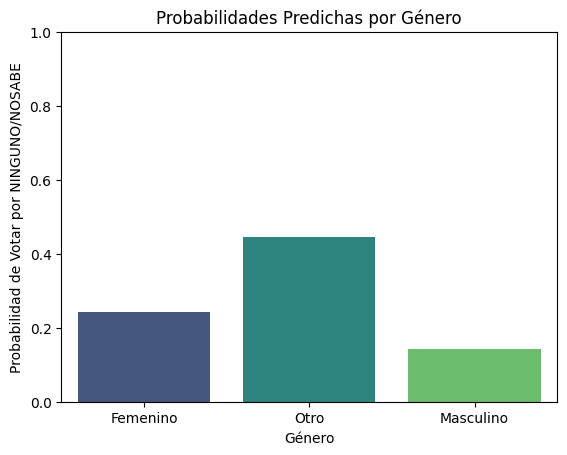

In [47]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por NINGUNO/NOSABE') 
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

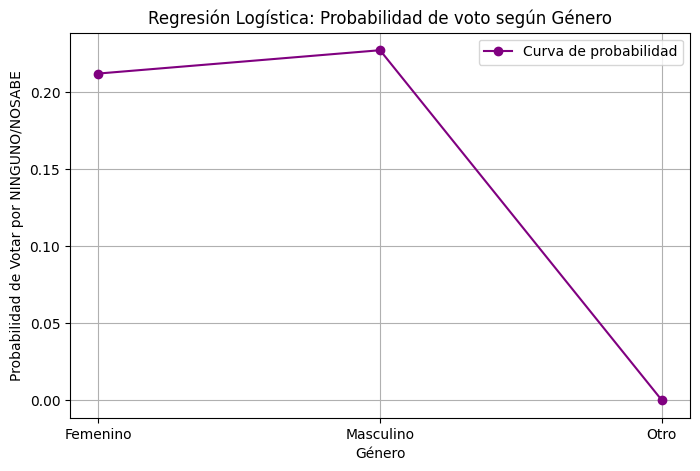

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por NINGUNO/NOSABE')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.309650
         Iterations 8
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      369
Method:                                    MLE   Df Model:                            2
Date:                         Tue, 26 Nov 2024   Pseudo R-squ.:                0.007185
Time:                                 11:32:53   Log-Likelihood:                -115.19
converged:                                True   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                    0.4345
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.6

/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/2982350561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

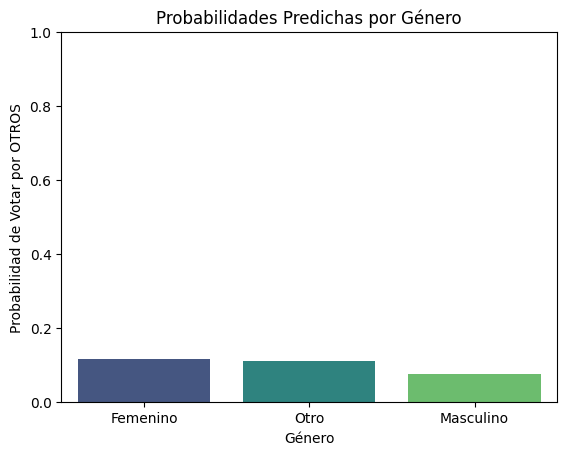

In [50]:

grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por OTROS')  
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

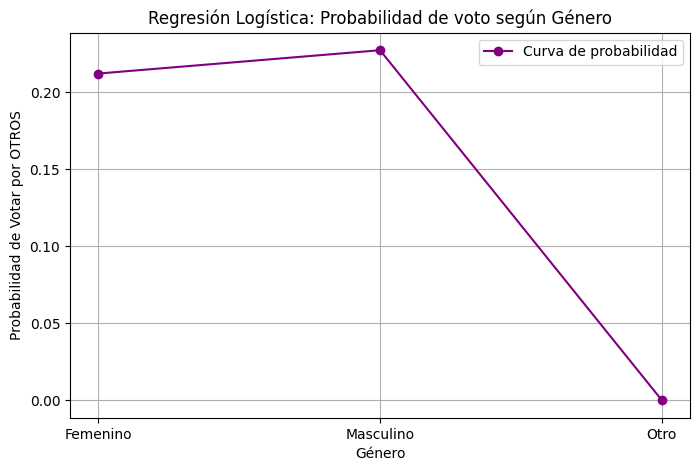

In [51]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por OTROS')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.135763
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                 0.04732
Time:                               11:32:53   Log-Likelihood:                -50.504
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                   0.08140
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0929        nan  

/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/969669001.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

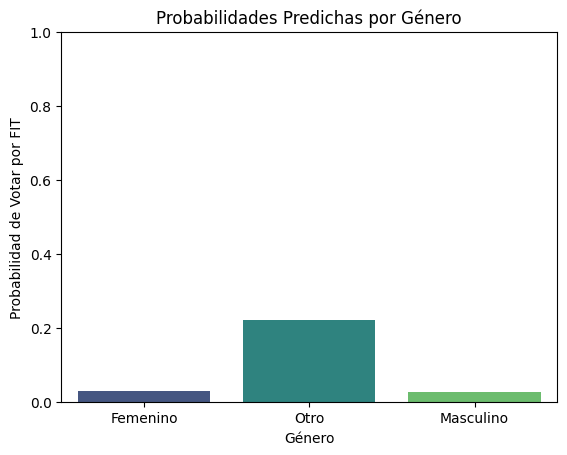

In [53]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por FIT')  
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

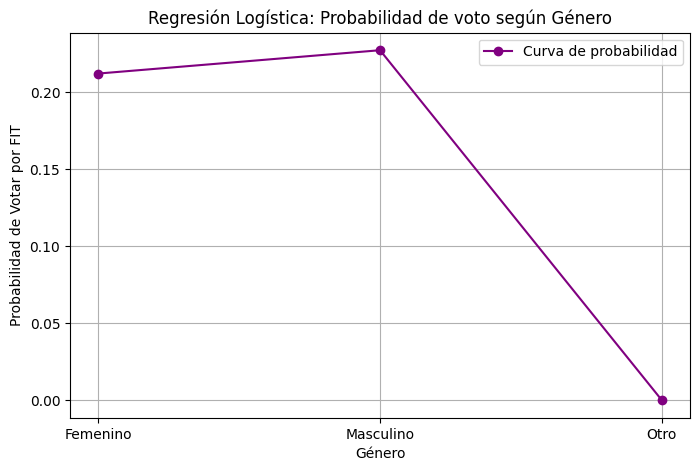

In [54]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por FIT')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
y = df_Rosario_final['INT DE VOTO X ESPACIO_PNK']

X = df_Rosario_final[['GENERO_Femenino', 'GENERO_Masculino', 'GENERO_Otro']]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.251273
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_PNK   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Tue, 26 Nov 2024   Pseudo R-squ.:                0.008240
Time:                               11:32:53   Log-Likelihood:                -93.474
converged:                             False   LL-Null:                       -94.250
Covariance Type:                   nonrobust   LLR p-value:                    0.4599
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5263        nan        nan        nan         nan    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/var/folders/_r/2kcmtcbj5kx81y0dbh3nwdl00000gn/T/ipykernel_42401/2948375644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

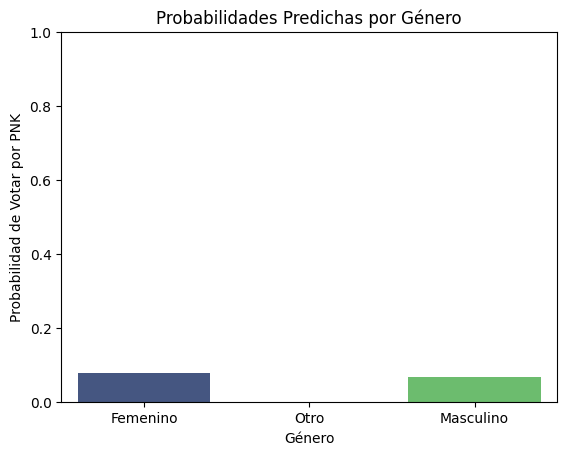

In [56]:
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por PNK')  
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

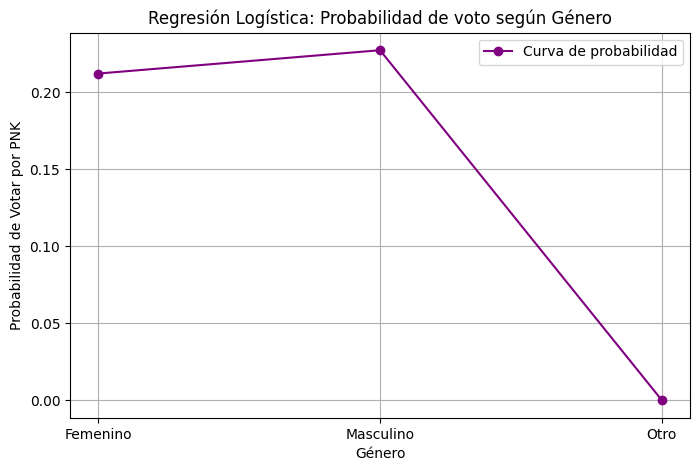

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(GENEROS, promedio_prob_genero, marker='o', linestyle='-', color='purple', label='Curva de probabilidad')
plt.xlabel('Género')
plt.ylabel('Probabilidad de Votar por PNK')
plt.title('Regresión Logística: Probabilidad de voto según Género')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
pip install geopandas matplotlib folium

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install shapely geopandas

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import geopandas as gpd

df_Rosario= pd.read_excel('./Rosario F.xlsx')

gdf_Rosario = gpd.GeoDataFrame(
    df_Rosario, 
    geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude'])
)

gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]

gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

gdf_Rosario = gdf_Rosario.to_crs(epsg=4326)

print(gdf_Rosario)
print(gdf_Rosario.crs)

     Coord1__Latitude  Coord1__Longitude      RADIO  \
0          -32.881458         -60.695274  820840409   
1          -32.882259         -60.693571  820840410   
2          -32.884731         -60.692882  820840502   
3          -32.884673         -60.693464  820840502   
4          -32.918833         -60.703628  820841013   
..                ...                ...        ...   
367        -32.941000         -60.688295  821190304   
368        -32.970114         -60.653051  821190305   
369        -32.907759         -60.752721  820843707   
370        -32.942161         -60.639935  820280512   
371        -32.957100         -60.637709  820842113   

                        geometry  
0    POINT (-60.69527 -32.88146)  
1    POINT (-60.69357 -32.88226)  
2    POINT (-60.69288 -32.88473)  
3    POINT (-60.69346 -32.88467)  
4    POINT (-60.70363 -32.91883)  
..                           ...  
367  POINT (-60.68829 -32.94100)  
368  POINT (-60.65305 -32.97011)  
369  POINT (-60.75272 -3

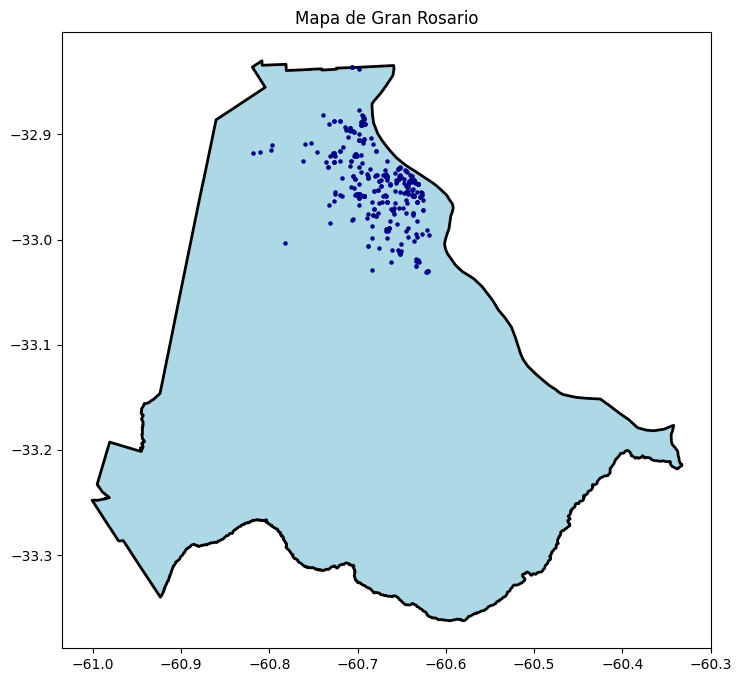

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df_Rosario= pd.read_excel('./Rosario F.xlsx')

mapa_granrosario = gpd.read_file(r'./Mapas/departamentos.geojson')


gdf_Rosario = gpd.GeoDataFrame(
    df_Rosario, 
    geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude'])
)

gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]

gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

gdf_Rosario = gdf_Rosario.to_crs(epsg=4326)


granrosario = mapa_granrosario[mapa_granrosario['NOMBRE'] == 'Rosario']


if gdf_Rosario.crs != granrosario.crs:
    gdf_Rosario = gdf_Rosario.to_crs(granrosario.crs)

puntosgranrosario = gdf_Rosario[gdf_Rosario.within(granrosario.geometry.iloc[0])]


fig, ax = plt.subplots(figsize=(10, 8))


granrosario.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=2)


puntosgranrosario.plot(ax=ax, color='darkblue', marker='o', markersize=5)

ax.set_title('Mapa de Gran Rosario')

plt.show()


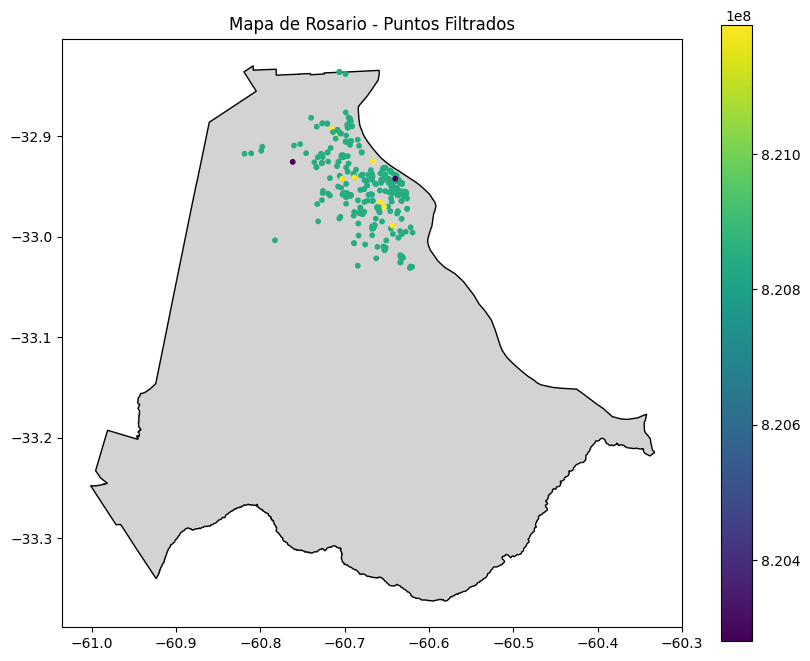

In [62]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point 

df_Rosario = pd.read_excel('./Rosario F.xlsx')
mapa_granrosario = gpd.read_file(r'./Mapas/departamentos.geojson')

gdf_Rosario = gpd.GeoDataFrame(df_Rosario, geometry=gpd.points_from_xy(df_Rosario['Coord1__Longitude'], df_Rosario['Coord1__Latitude']))
gdf_Rosario = gdf_Rosario[['Coord1__Latitude', 'Coord1__Longitude', 'RADIO', 'geometry']]
gdf_Rosario = gdf_Rosario.set_crs(epsg=4326)

granrosario = mapa_granrosario[mapa_granrosario['NOMBRE'] == 'Rosario']
puntosgranrosario = gdf_Rosario[gdf_Rosario.within(granrosario.geometry.iloc[0])]

buffer_distance = 0.01 
buffer_geometry = granrosario.geometry.iloc[0].buffer(buffer_distance)
outliers = puntosgranrosario[~puntosgranrosario.geometry.within(buffer_geometry)]
filtered_points = puntosgranrosario[puntosgranrosario.geometry.within(buffer_geometry)]

fig, ax = plt.subplots(figsize=(10, 8))
granrosario.plot(ax=ax, color='lightgray', edgecolor='black')
filtered_points.plot(ax=ax, column='RADIO', cmap='viridis', legend=True, markersize=10)
plt.title('Mapa de Rosario - Puntos Filtrados')
plt.show()

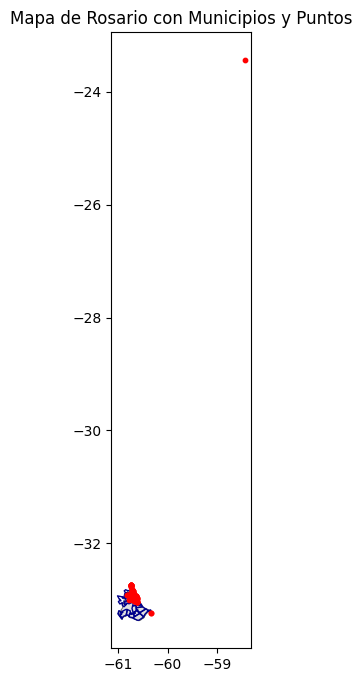

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Leer archivos GeoJSON
mapa_departamentos = gpd.read_file(r'./Mapas/departamentos.geojson')
mapa_municipios = gpd.read_file(r'./Mapas/municipios.geojson')

# Verificar y asegurar que tengan CRS definido
if mapa_departamentos.crs is None:
    mapa_departamentos = mapa_departamentos.set_crs(epsg=4326)
else:
    mapa_departamentos = mapa_departamentos.to_crs(epsg=4326)

if mapa_municipios.crs is None:
    mapa_municipios = mapa_municipios.set_crs(epsg=4326)
else:
    mapa_municipios = mapa_municipios.to_crs(epsg=4326)

# Leer datos de puntos
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Verificar columnas de coordenadas
if 'Coord1__Longitude' not in puntos_rosario.columns or 'Coord1__Latitude' not in puntos_rosario.columns:
    raise ValueError("Las columnas 'Coord1__Longitude' y 'Coord1__Latitude' no se encuentran en el archivo Excel.")

# Crear GeoDataFrame de puntos
gdf_puntos = gpd.GeoDataFrame(
    puntos_rosario, 
    geometry=gpd.points_from_xy(puntos_rosario['Coord1__Longitude'], puntos_rosario['Coord1__Latitude'])
)
gdf_puntos = gdf_puntos.set_crs(epsg=4326)

# Filtrar el departamento de Rosario
if 'NOMBRE' not in mapa_departamentos.columns:
    raise ValueError("La columna 'NOMBRE' no existe en el GeoJSON de departamentos.")
rosario_departamento = mapa_departamentos[mapa_departamentos['NOMBRE'] == 'Rosario']

# Filtrar municipios seleccionados
municipios_seleccionados = [
    "Municipio Rosario", "Municipio Arroyo Seco", "Municipio Funes", "Municipio Granadero Baigorria", 
    "Municipio Pérez", "Municipio Pueblo Esther", "Municipio Villa Gobernador Gálvez", "Comuna Acebal", 
    "Comuna Albarellos", "Comuna Álvarez", "Comuna Alvear", "Comuna Arminda", "Comuna Carmen del Sauce", 
    "Comuna Coronel Bogado", "Comuna Coronel Domínguez", "Comuna Fighiera", "Comuna General Lagos", 
    "Comuna Ibarlucea", "Comuna Piñero", "Comuna Pueblo Muñoz", "Comuna Soldini", "Comuna Villa Amelia", 
    "Comuna Zavalla", "Comuna Uranga"
]

if 'nombre_completo' not in mapa_municipios.columns:
    raise ValueError("La columna 'nombre_completo' no existe en el GeoJSON de municipios.")
municipios_rosario = mapa_municipios[mapa_municipios["nombre_completo"].isin(municipios_seleccionados)]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot del departamento
rosario_departamento.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

# Plot de los municipios
municipios_rosario.plot(ax=ax, color='none', edgecolor='darkblue', linewidth=1, zorder=2)

# Plot de los puntos
gdf_puntos.plot(ax=ax, color='red', markersize=10, zorder=3)

# Personalizar el mapa
ax.set_title('Mapa de Rosario con Municipios y Puntos')
plt.show()

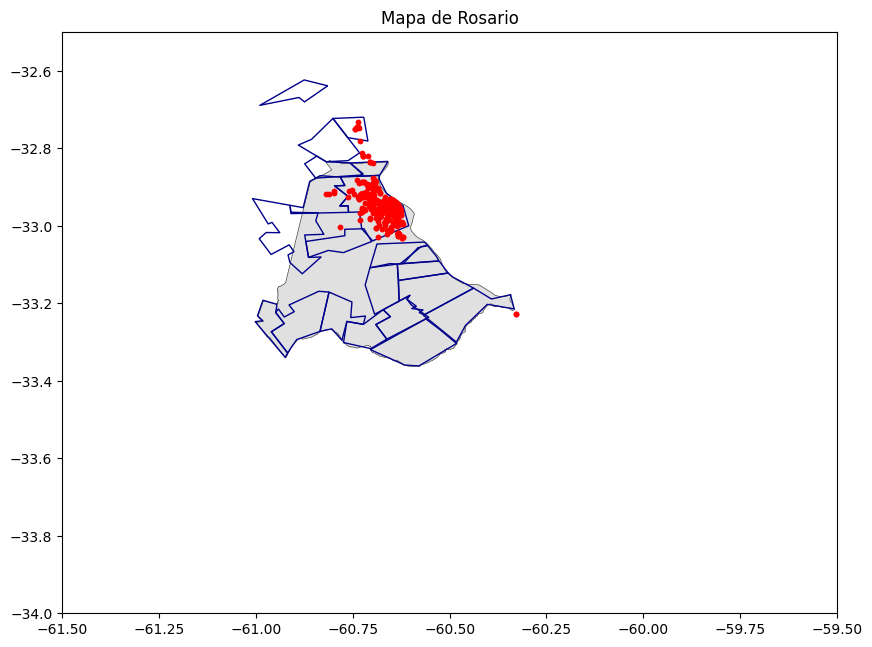

In [64]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Leer archivos GeoJSON
mapa_departamentos = gpd.read_file(r'./Mapas/departamentos.geojson')
mapa_municipios = gpd.read_file(r'./Mapas/municipios.geojson')

# Leer datos de puntos
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Crear GeoDataFrame de puntos
gdf_puntos = gpd.GeoDataFrame(
    puntos_rosario, 
    geometry=gpd.points_from_xy(puntos_rosario['Coord1__Longitude'], puntos_rosario['Coord1__Latitude'])
)

# Filtrar el departamento de Rosario
rosario_departamento = mapa_departamentos[mapa_departamentos['NOMBRE'] == 'Rosario']

# Filtrar municipios seleccionados
municipios_seleccionados = [
    "Municipio Rosario", "Municipio Arroyo Seco", "Municipio Funes", "Municipio Granadero Baigorria", 
    "Municipio Pérez", "Municipio Pueblo Esther", "Municipio Villa Gobernador Gálvez", "Comuna Acebal", 
    "Comuna Albarellos", "Comuna Álvarez", "Comuna Alvear", "Comuna Arminda", "Comuna Carmen del Sauce", 
    "Comuna Coronel Bogado", "Comuna Coronel Domínguez", "Comuna Fighiera", "Comuna General Lagos", 
    "Comuna Ibarlucea", "Comuna Piñero", "Comuna Pueblo Muñoz", "Comuna Soldini", "Comuna Villa Amelia", 
    "Comuna Zavalla", "Comuna Uranga","Municipio Granadero Baigorria","Municipio Capitán Bermúdez","Comuna Empalme Villa Constitución","Municipio Fray Luis Beltrán","Comuna Pueblo Andino","Comuna Ricardone","Municipio San Lorenzo", "Comuna Pavón", "Municipio Puerto General San Martín"
]

municipios_rosario = mapa_municipios[mapa_municipios["nombre_completo"].isin(municipios_seleccionados)]

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot del departamento
rosario_departamento.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

# Plot de los municipios (si deseas incluirlos más tarde)
municipios_rosario.plot(ax=ax, color='none', edgecolor='darkblue', linewidth=1, zorder=2)
# Plot de los puntos
gdf_puntos.plot(ax=ax, color='red', markersize=10, zorder=3)

# Ajustar límites del eje
ax.set_xlim(-61.5, -59.5)
ax.set_ylim(-34.0, -32.5)


# Personalizar el mapa
ax.set_title('Mapa de Rosario')
plt.show()

In [65]:
print(mapa_departamentos.crs)
print(mapa_municipios.crs)
print(gdf_puntos.crs)



EPSG:4326
EPSG:4326
None


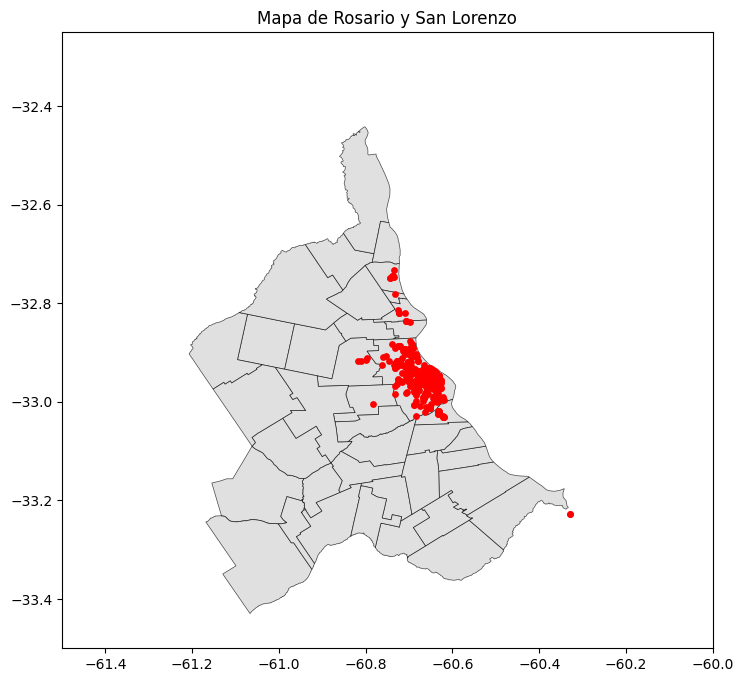

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Leer archivos GeoJSON
mapa_distritos_Rosario = gpd.read_file(r'./Mapas/distritos.geojson')

# Leer datos de puntos
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Crear GeoDataFrame de puntos
gdf_puntos = gpd.GeoDataFrame(
    puntos_rosario, 
    geometry=gpd.points_from_xy(puntos_rosario['Coord1__Longitude'], puntos_rosario['Coord1__Latitude']),
    crs="EPSG:4326"  # Asegura que los puntos estén en el CRS correcto
)

# Filtrar departamentos "Rosario" y "San Lorenzo"
rosario_san_lorenzo = mapa_distritos_Rosario[mapa_distritos_Rosario['nombre_departamento'].isin(['Rosario', 'San Lorenzo'])]

# Verificar si el CRS de los puntos y el mapa coinciden
if gdf_puntos.crs != mapa_distritos_Rosario.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_distritos_Rosario.crs)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot del departamento Rosario y San Lorenzo
rosario_san_lorenzo.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

# Plot de los puntos (ajustando el tamaño del marcador)
gdf_puntos.plot(ax=ax, color='red', markersize=15, zorder=3)


ax.set_ylim(-33.5, -32.25)
ax.set_xlim(-61.5, -60)

# Personalizar el mapa
ax.set_title('Mapa de Rosario y San Lorenzo')

# Mostrar el mapa
plt.show()


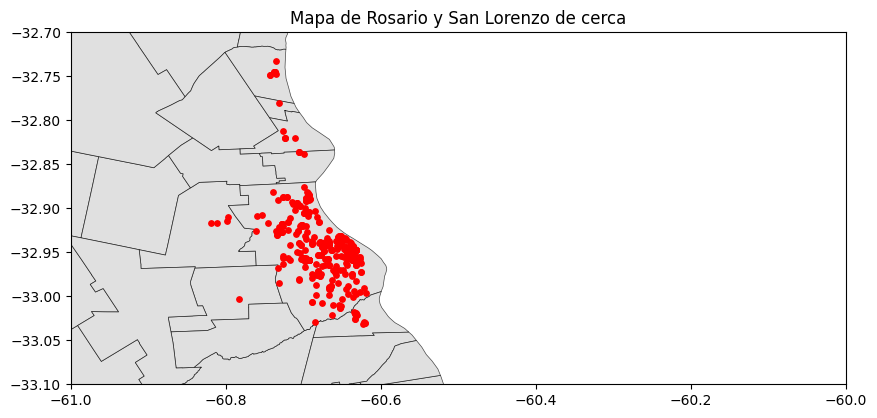

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Leer archivos GeoJSON
mapa_distritos_Rosario = gpd.read_file(r'./Mapas/distritos.geojson')

# Leer datos de puntos
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Crear GeoDataFrame de puntos
gdf_puntos = gpd.GeoDataFrame(
    puntos_rosario, 
    geometry=gpd.points_from_xy(puntos_rosario['Coord1__Longitude'], puntos_rosario['Coord1__Latitude']),
    crs="EPSG:4326"  # Asegura que los puntos estén en el CRS correcto
)

# Filtrar departamentos "Rosario" y "San Lorenzo"
rosario_san_lorenzo = mapa_distritos_Rosario[mapa_distritos_Rosario['nombre_departamento'].isin(['Rosario', 'San Lorenzo'])]

# Verificar si el CRS de los puntos y el mapa coinciden
if gdf_puntos.crs != mapa_distritos_Rosario.crs:
    gdf_puntos = gdf_puntos.to_crs(mapa_distritos_Rosario.crs)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot del departamento Rosario y San Lorenzo
rosario_san_lorenzo.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

# Plot de los puntos (ajustando el tamaño del marcador)
gdf_puntos.plot(ax=ax, color='red', markersize=15, zorder=3)


ax.set_ylim(-33.1, -32.7)
ax.set_xlim(-61, -60)

# Personalizar el mapa
ax.set_title('Mapa de Rosario y San Lorenzo de cerca')

# Mostrar el mapa
plt.show()


In [82]:
import pandas as pd
import geopandas as gpd

# Leer los archivos
mapa_radios = gpd.read_file('./Mapas/radios_eph.shp')
puntos_rosario = pd.read_excel('./Rosario F.xlsx')

# Verificar las primeras filas de las columnas 'localidade' y 'RADIO'
print("Primeros valores de 'localidade' en el shapefile:")
print(mapa_radios['localidade'].head())

print("Primeros valores de 'RADIO' en el DataFrame:")
print(puntos_rosario['RADIO'].head())

# Limpiar la columna 'localidade' para extraer solo los números
mapa_radios['localidade'] = mapa_radios['localidade'].str.extract('(\d+)', expand=False)

# Convertir las columnas a tipo numérico
mapa_radios['localidade'] = pd.to_numeric(mapa_radios['localidade'], errors='coerce')
puntos_rosario['RADIO'] = pd.to_numeric(puntos_rosario['RADIO'], errors='coerce')

# Verificar si las columnas ahora son numéricas y no contienen valores nulos
print("Valores únicos en 'localidade' después de la limpieza:")
print(mapa_radios['localidade'].unique())

print("Valores únicos en 'RADIO' después de la limpieza:")
print(puntos_rosario['RADIO'].unique())

# Realizar el merge
gdf_puntos = puntos_rosario.merge(mapa_radios[['localidade', 'geometry']], left_on='RADIO', right_on='localidade', how='inner')

# Verificar el resultado del merge
print("Cantidad de filas después del merge:")
print(gdf_puntos.shape)

# Convertir el DataFrame resultante en un GeoDataFrame
gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

# Visualizar los puntos en el mapa (si hay datos)
if not gdf_puntos.empty:
    gdf_puntos.plot()

    # Guardar el GeoDataFrame como un archivo GeoJSON
    gdf_puntos.to_file('./Mapas/puntos_con_radios.geojson', driver='GeoJSON')
else:
    print("El GeoDataFrame está vacío, no se puede visualizar.")



Primeros valores de 'localidade' en el shapefile:
0    (02001010) Ciudad Autónoma de Buenos Aires
1    (02001010) Ciudad Autónoma de Buenos Aires
2    (02001010) Ciudad Autónoma de Buenos Aires
3    (02001010) Ciudad Autónoma de Buenos Aires
4    (02001010) Ciudad Autónoma de Buenos Aires
Name: localidade, dtype: object
Primeros valores de 'RADIO' en el DataFrame:
0    820840409
1    820840410
2    820840502
3    820840502
4    820841013
Name: RADIO, dtype: int64
Valores únicos en 'localidade' después de la limpieza:
[ 2001010.       nan  2002010.  2003010.  2004010.  2005010.  2006010.
  2007010. 50007010. 62007090. 70007020. 70007000. 70007010. 94007010.
  2008010.  2009010.  2010010.  2011010.  2012010.  2013010.  2014010.
 14014010. 14014000. 34014020. 34014000. 46014010. 46014000. 90014010.
 90014000. 90014020. 94014020.  2015010. 30015060. 30015000. 14021160.
 14021030. 14021000. 14021010. 14021110. 14021025. 14021220. 14021165.
 14021240. 14021310. 14021250. 14021230. 14021280. 

In [71]:
# Leer el archivo JSON con geopandas
mapa_radios = gpd.read_file('./Mapas/radios_eph.json')

# Asegúrate de que contiene geometrías válidas
print(mapa_radios['geometry'].head())

# Verificar si las columnas coinciden en nombre y tipo
print(mapa_radios.columns)
print(puntos_rosario.columns)


0    MULTIPOLYGON (((4200423.500 6147563.500, 42010...
1    MULTIPOLYGON (((4199056.500 6147725.500, 41990...
2    MULTIPOLYGON (((4199063.500 6147683.500, 41990...
3    MULTIPOLYGON (((4199337.500 6147560.500, 41993...
4    MULTIPOLYGON (((4199386.000 6147696.000, 41993...
Name: geometry, dtype: geometry
Index(['id', 'eph_codagl', 'eph_aglome', 'codaglo', 'aglomerado', 'codprov',
       'nomprov', 'coddepto', 'localidade', 'frac2010', 'radio2010',
       'the_geom', 'tiporad', 'entidades', 'geometry'],
      dtype='object')
Index(['interview__key', 'METODO', 'Coord1__Latitude', 'Coord1__Longitude',
       'EDAD', 'GENERO', 'INT DE VOTO X ESPACIO', 'RADIO'],
      dtype='object')


In [72]:
# Verificar el CRS actual
print(mapa_radios.crs)

# Si es necesario, transformar al CRS geográfico WGS84 (EPSG:4326)
if mapa_radios.crs != "EPSG:4326":
    mapa_radios = mapa_radios.to_crs("EPSG:4326")


EPSG:22183


/Users/camiroberto/Library/Python/3.11/lib/python/site-packages/geopandas/io/file.py:608: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


ValueError: aspect must be finite and positive 

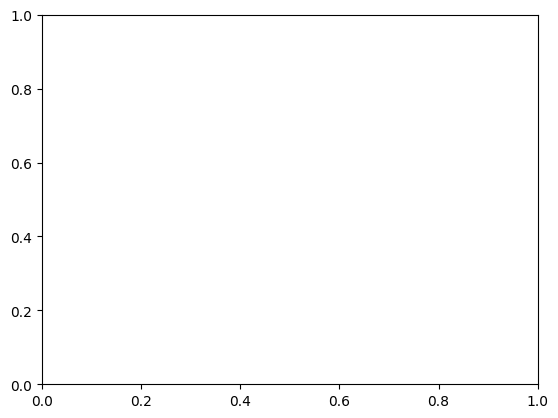

In [75]:
# Renombrar la columna de radios censales
mapa_radios = mapa_radios.rename(columns={'radio2010': 'RADIO'})

# Convertir ambas columnas a string para asegurar compatibilidad
mapa_radios['RADIO'] = mapa_radios['RADIO'].astype(str)
puntos_rosario['RADIO'] = puntos_rosario['RADIO'].astype(str)

# Unir los datos de puntos con las geometrías de los radios censales
gdf_puntos = puntos_rosario.merge(mapa_radios[['RADIO', 'geometry']], on='RADIO')

# Convertir el resultado en un GeoDataFrame
gdf_puntos = gpd.GeoDataFrame(gdf_puntos, geometry='geometry', crs=mapa_radios.crs)

# Guardar el archivo GeoJSON en la carpeta "Mapas"
gdf_puntos.to_file('./Mapas/puntos_con_radios.geojson', driver='GeoJSON')

# Visualizar en un mapa rápido
gdf_puntos.plot()


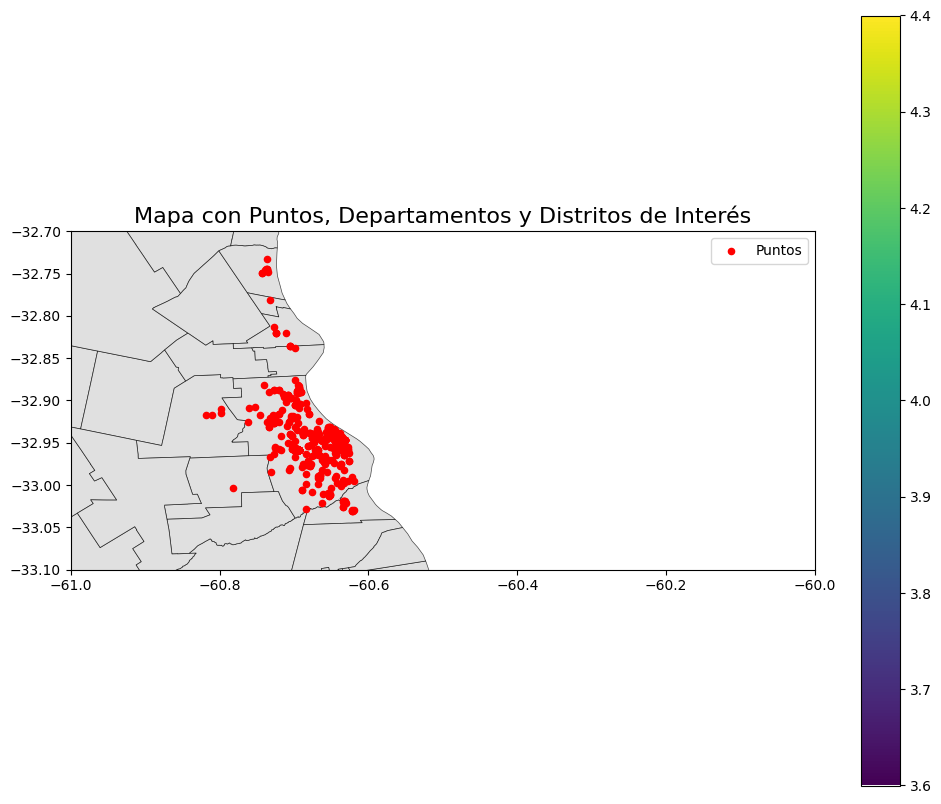

In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Cargamos el archivo de Excel
df_puntos = pd.read_excel('./Rosario F.xlsx')  # Cambia al nombre real
gdf_puntos = gpd.GeoDataFrame(
    df_puntos,
    geometry=gpd.points_from_xy(df_puntos['Coord1__Longitude'], df_puntos['Coord1__Latitude']) 
)
gdf_puntos = gdf_puntos.set_crs(epsg=4326)  # Asegurar el sistema de referencia geográfica

# Cargamos el archivo GeoJSON de departamentos
df_departamentos = pd.read_csv('C:/Users/Usuario/Downloads/Índice de Calidad de Vida 2010.csv')

# Crear un GeoDataFrame a partir de las columnas de latitud y longitud
gdf_departamentos = gpd.GeoDataFrame(
    df_departamentos,
    geometry=gpd.points_from_xy(df_departamentos['Longitud del centroide'], df_departamentos['Latitud del centroide'])
)
gdf_departamentos = gdf_departamentos.set_crs(epsg=4326)  # Definimos el sistema de referencia

departamentos_interes = ['Rosario', 'San Lorenzo', 'Villa Gobernador Gálvez']  # Lista de departamentos
gdf_departamentos_filtrados = gdf_departamentos[gdf_departamentos['Departamento'].isin(departamentos_interes)]

# Leemos el archivo CSV con los índices
df_indices = pd.read_csv('C:/Users/Usuario/Downloads/Índice de Calidad de Vida 2010.csv')

# Nos aeguramos de que las columnas de nombres de departamentos coincidan
df_departamentos['Departamento'] = df_departamentos['Departamento'].str.strip()
gdf_departamentos = gdf_departamentos.merge(df_indices[['Departamento', 'Nivel de calidad de vida']], on='Departamento', how='left')

# Cargamos el archivo GeoJSON de distritos
gdf_distritos = gpd.read_file('./Mapas/distritos.geojson')
gdf_distritos = gdf_distritos.to_crs(epsg=4326)

minx, miny, maxx, maxy = gdf_departamentos_filtrados.total_bounds

# Creamos figura y ejes
fig, ax = plt.subplots(figsize=(12, 10))

# Ploteamos los distritos
gdf_distritos.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5, alpha=0.7, zorder=1)

# Ploteamos los departamentos de interés
gdf_departamentos_filtrados.plot(ax=ax, color='none', edgecolor='blue', linewidth=1.5, zorder=2)

# Asignamos un color a cada departamento según su índice de calidad de vida
# Definir una paleta de colores para el índice
norm = mcolors.Normalize(vmin=gdf_departamentos_filtrados['Nivel de calidad de vida'].min(), 
                         vmax=gdf_departamentos_filtrados['Nivel de calidad de vida'].max())
cmap = plt.cm.viridis  # Puedes cambiar la paleta si lo prefieres

# Ploteamos los departamentos de interés, coloreando según el índice
gdf_departamentos_filtrados.plot(ax=ax, column='Nivel de calidad de vida', cmap=cmap, linewidth=0.8, 
                                 edgecolor='black', legend=True, zorder=2, norm=norm)


# Ploteamos los puntos
gdf_puntos.plot(ax=ax, color='red', markersize=20, zorder=3, label='Puntos')

ax.set_ylim(-33.1, -32.7)
ax.set_xlim(-61, -60)

# Personalizamos el mapa
ax.set_title('Mapa con Puntos, Departamentos y Distritos de Interés', fontsize=16)
ax.legend()
plt.show()
